In [1]:
from PyNomaly import loop
import pandas as pd
from pydataset import data
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [16]:
df = pd.read_csv('Desktop/HTRU2/HTRU_2.csv')

In [17]:
df.head()

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve,class_labels
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [18]:
pulsar = pd.DataFrame(df.drop('class_labels', 1))

In [5]:
pulsar.head()


,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [6]:
#db = DBSCAN(eps=0.9, min_samples=10).fit(pulsar)
m = loop.LocalOutlierProbability(pulsar).fit()
scores_noclust = m.local_outlier_probabilities
#m_clust = loop.LocalOutlierProbability(pulsar, cluster_labels=list(db.labels_)).fit()
#scores_clust = m_clust.local_outlier_probabilities


In [19]:

#pulsar_clust = pd.DataFrame(pulsar.copy())
#pulsar_clust['scores'] = scores_clust
#pulsar_clust['labels'] = db.labels_
df['scores'] = scores_noclust


In [20]:
df.head()

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve,class_labels,scores
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0,0.0673505
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0,0.590866
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0,0.0191719
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0,0.185533
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0,0


(array([10927.,  2888.,  1752.,  1007.,   551.,   315.,   191.,   112.,
           85.,    70.]),
 array([0.0, 0.0999999999983642, 0.1999999999967284, 0.29999999999509264,
        0.3999999999934568, 0.499999999991821, 0.5999999999901853,
        0.6999999999885494, 0.7999999999869136, 0.8999999999852778,
        0.999999999983642], dtype=object),
 <a list of 10 Patch objects>)

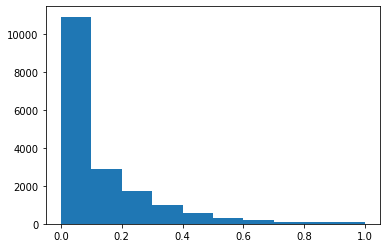

In [21]:
plt.hist(df['scores'])

In [24]:
sorted_val = df.sort_values(by = 'scores' , ascending = False)

In [25]:
sorted_val.head()

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve,class_labels,scores
9111,84.664062,82.484021,0.934228,-0.814274,1.197324,12.290091,17.146209,320.931368,0,1
12235,128.656250,90.250557,-0.022992,-1.668540,2.541806,22.377592,8.947225,79.613744,0,0.999999
758,59.351562,76.784458,1.536309,0.736696,0.636288,10.566986,21.017232,466.135457,0,0.999998
1677,111.218750,71.325173,0.333783,-1.215763,1.031773,12.953764,15.971510,277.369560,0,0.999994
2953,66.796875,67.402865,1.134214,0.007024,1.111204,13.058532,13.967321,217.194927,0,0.999988


In [27]:
temp = sorted_val[:1639]

In [28]:
temp[temp['class_labels'] == 1]

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve,class_labels,scores
14412,39.843750,34.381462,4.322010,22.614915,1.905518,11.812581,12.385193,210.952158,1,0.999061
9288,57.554688,46.243379,2.740056,7.864373,2.285117,16.778355,10.450370,121.693314,1,0.994624
11292,37.484375,42.823581,3.227629,11.110487,1.466555,13.565204,13.283802,198.457932,1,0.98707
5156,99.937500,55.624965,0.928824,0.360270,1.985786,15.985067,12.095032,159.532374,1,0.964979
10691,36.039062,46.977455,3.312638,10.616789,1.495819,13.535071,13.306210,200.857022,1,0.964744
7258,68.468750,40.750947,2.093171,5.353433,53.852843,32.922506,-0.731596,0.309300,1,0.962853
14467,96.070312,74.560083,0.703671,-0.960082,10.634615,35.096062,3.711222,14.282259,1,0.958422
11163,16.453125,36.820905,4.907022,24.519824,57.129599,48.856634,1.767360,3.527974,1,0.945765
11349,25.679688,29.975233,6.935823,50.086721,16.848662,46.492741,3.325768,10.971398,1,0.941589
5006,117.398438,69.209074,0.108451,-1.139069,4.023411,26.498491,7.266545,54.365238,1,0.935321


In [29]:
214/1639

0.1305674191580232